<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev3MachineLearning/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support vector Machine (SvM)

MAE: 0.41419537200880363
MSE: 0.5163562325774353
RMSE: 0.7185793154394547
R²: 0.3466166767414579


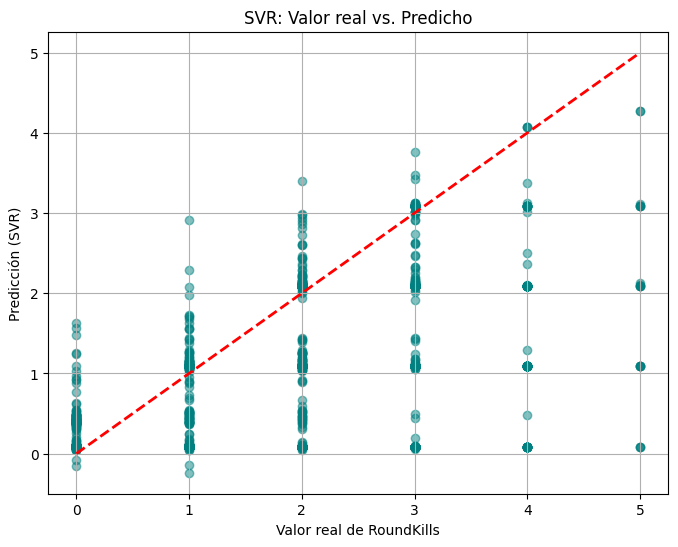

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Paso 2: Cargar el dataset
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Paso 3: Seleccionar features y target (más informativos)
features = [
    'TeamStartingEquipmentValue',
    'RoundAssists',
    'RoundHeadshots',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown'
]

df = df.dropna(subset=features + ['RoundKills'])
X = df[features]
y = df['RoundKills']

# Paso 4: Escalar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Paso 5: División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Paso 6: Entrenamiento del modelo SVR con kernel RBF (más preciso)
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)

# Paso 7: Predicción
y_pred_scaled = svr.predict(X_test)

# Paso 8: Invertir escala para interpretar resultados reales
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Paso 9: Evaluación
mae = mean_absolute_error(y_test_real, y_pred_real)
mse = mean_squared_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred_real)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Paso 10: Gráfico real vs predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.5, color='teal')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel("Valor real de RoundKills")
plt.ylabel("Predicción (SVR)")
plt.title("SVR: Valor real vs. Predicho")
plt.grid(True)
plt.show()

El Support Vector Machine (SVM) es un modelo que busca encontrar una separación óptima en los datos para predecir RoundKills. Sin embargo, los resultados muestran que su rendimiento es inferior a Random Forest en términos de precisión y estabilidad.
Resultados Clave
* MAE = 0.414 → Error promedio similar al de Random Forest, pero sin mejorarlo significativamente.
* MSE = 0.516 → Mayor error cuadrático medio en comparación con Random Forest (0.320), lo que indica predicciones menos exactas.
* RMSE = 0.719 → Mayor dispersión en el error, lo que sugiere que el modelo tiene dificultades para capturar patrones precisos.
* R² = 0.347 → Explica solo el 34.7% de la variabilidad en RoundKills, siendo muy inferior a Random Forest (59.4%).

Conclusión


El modelo SVM tiene un rendimiento inferior a Random Forest, con un mayor error y menor capacidad de ajuste a los datos. Esto indica que no logra capturar correctamente la relación entre las variables predictoras y RoundKills.
